### Ollama
* Please first download **Ollama** from: https://ollama.com/download and install the app
* There are many open source models you can use; here are some: https://github.com/ollama/ollama
* For now, lets focus on two models:
  1) **llama3.2**
  2) **llama3.2-vision**
* To use these models first you need to $pull$ them, to do so please run the following code in your terminal:
  * **ollama pull **$your \ model \ name$****


#### Let's see what we can do with Ollama and llama3.2  


In [1]:
import ollama
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# os.environ["OLLAMA_CUDA"] = "1" 
# os.environ["OLLAMA_FLASH_ATTENTION"] = "1" 
# os.environ["OLLAMA_LLAMA_EXTRA_ARGS"] = "--flash-attn"

In [2]:
!ollama pull llama3.2:3b

pulling manifest â ‹ pulling manifest â ™ pulling manifest â ¹ pulling manifest â ¸ pulling manifest â ¼ pulling manifest â ´ pulling manifest â ¦ pulling manifest 
pulling dde5aa3fc5ff... 100% â–•â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–� 2.0 GB                         
pulling 966de95ca8a6... 100% â–•â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–� 1.4 KB                         
pulling fcc5a6bec9da... 100% â–•â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–� 7.7 KB                         
pulling a70ff7e570d9... 100% â–•â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–� 6.0 KB                         
pulling 56bb8bd477a5... 100% â–•â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–�   96 B                         
pulling 34bb5ab01051... 100% â–•â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–�  561 B                         
verifying sha256 digest 
writing manifest 
success 


### Let's create a chat function so we can talk to our new friend. For ending your conversation just write "bye llm"

In [2]:
def chat():
    conversation_history = []
    bye = True
    while bye:
        prompt = input()
        conversation_history.append({'role':'user','content':prompt}) 
        response = ollama.chat(
        model='llama3.2:3b',
        messages=conversation_history,
        options = {'temperature':1, 'num_predict':1024})
        res = response['message']['content']
        print('')
        print(f'Assistant:\n{res}')
        conversation_history.append({'role':'assistant','content':res})
        print('============================================================================================================================')
        if prompt == 'bye llm':
            bye=False

In [3]:
chat()

 hi



Assistant:
How can I assist you today?


 my name is mansour



Assistant:
Hello Mansour! It's nice to meet you. Is there something I can help you with or would you like to chat for a bit?


 what was my name?



Assistant:
You mentioned it earlier, your name is Mansour. We started our conversation with that introduction.


 why marketing is interesting?



Assistant:
Mansour, marketing can be interesting for several reasons:

1. **It's a constantly evolving field**: New technologies, trends, and consumer behaviors are emerging all the time, which means marketers have to stay up-to-date and adapt their strategies to keep pace.

2. **It involves creative problem-solving**: Marketing requires finding innovative ways to communicate with customers, build brand awareness, and drive sales. It's a challenge that combines art and science.

3. **It has a direct impact on businesses and people's lives**: Marketing can make or break a business, and it can also influence how we think about products, services, and ideas. It's a powerful tool for shaping public opinion and driving social change.

4. **There are many different types of marketing**: From digital marketing to event marketing, from social media to content marketing, there are countless ways to approach the field. This variety keeps things interesting and allows marketers to find their nic

 bye llm



Assistant:
It was nice chatting with you, Mansour! Have a great day and feel free to come back if you have any more questions or just want to say hello. Bye for now!


#### Now lets summarize a text

In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
source = urlopen('https://en.wikipedia.org/wiki/2024_United_States_presidential_election').read()
soup = BeautifulSoup(source,'lxml')
paras = []
for paragraph in soup.find_all('p'):
    paras.append(str(paragraph.text))
text = [tx.strip() for tx in paras if len(tx)>3]
text = ' '.join(text)
text = re.sub(r"\[.*?\]+", '', text)
text = text.replace(u'\xa0', u' ')

In [5]:
text

'Joe Biden\nDemocratic Donald Trump\nRepublican Presidential elections were held in the United States on November 5, 2024. The Republican Party\'s ticket—Donald Trump, who was the 45th president of the United States from 2017 to 2021, and JD Vance, the junior U.S. senator from Ohio—defeated the Democratic Party\'s ticket—Kamala Harris, the incumbent vice president, and Tim Walz, the 41st governor of Minnesota. The incumbent president, Joe Biden of the Democratic Party, initially ran for re-election as the party\'s presumptive nominee, facing little opposition and easily defeating Representative Dean Phillips during the Democratic primaries; however, what was broadly considered a poor debate performance in June 2024 intensified concerns about his age and health, and led to calls within his party for him to leave the race. After initially declining to do so, Biden withdrew on July 21, becoming the first eligible incumbent president to withdraw since Lyndon B. Johnson in 1968. Biden endor

In [14]:
response = ollama.chat(
    model='llama3.2:3b',
    messages=[{'role':'system',
              'content':'You are amazing in summarizing texts'},
             {'role':'user',
             'content':f'Summarize this text for me: {text}'}],
                options = {'temperature':1, 'num_predict':2024})
res = response['message']['content']

In [15]:
print(res)

Kamala Harris' 2020 presidential campaign faced significant challenges in the United States, ultimately leading to her decision to suspend her campaign in December 2019. The main reasons for her suspension were:

1. Lack of momentum: Harris struggled to gain traction and build a strong coalition behind her.
2. Insufficient funding: Despite receiving significant financial backing from donors and PACs, her campaign faced persistent fundraising challenges.
3. Negative media coverage: Harris received intense scrutiny and criticism from the media, which often focused on her past positions and policy proposals.
4. Internal party divisions: The Democratic Party was divided over issues like Medicare for All, climate change, and gun control, making it difficult for Harris to find common ground with other candidates.

According to exit polls, voters who prioritized economic concerns (inflation, wages, etc.) largely voted for Joe Biden. Meanwhile, voters concerned about immigration largely backed

#### Let's conduct a cool simulation (This is not perfect for sure, you can change it and make ir better)

In [24]:
sim_prices = []
i = 0
while i<3:
    response = ollama.chat(
        model='llama3.2:3b',
        messages=[{'role':'user',
                 'content':'Assume we have 100 customers. We ask each of them how much they are willing to pay for a soda and they tell us a number up to 2 decimal. Give me those 100 numbers.Your output should be only 100 numbers'}],
                 options = {'temperature':1, 'num_predict':1024})
    res = response['message']['content']    
    prices = re.findall(r'\$(\d+\.\d+)', res)
    prices = list(map(lambda x: float(x), prices))
    mean_p = np.mean(prices)
    if pd.isnull(mean_p):
        pass
    else: 
        sim_prices.append(np.mean(prices))
        i+=1
    print(i)

1
2
3
4
4
4
5
5
5
6
6
7
7
8
8
8
8
9
9
10


<Axes: ylabel='Frequency'>

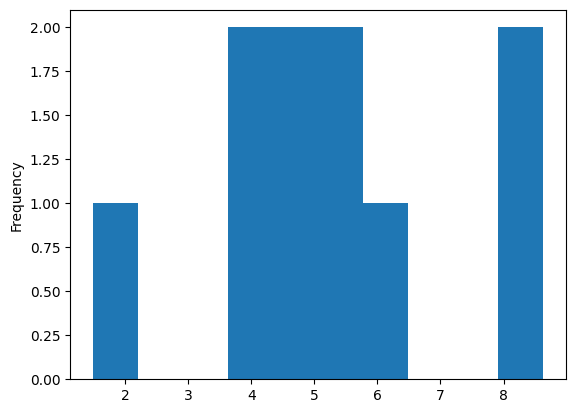

In [25]:
pd.Series(sim_prices).plot(kind='hist')

### Finally, lets talk with pictures!!! (You can restart your kernel if it takes a lot of time)

In [26]:
!ollama pull llama3.2-vision:latest

pulling manifest â ‹ pulling manifest â ™ pulling manifest â ¹ pulling manifest â ¸ pulling manifest 
pulling 11f274007f09... 100% â–•â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–� 6.0 GB                         
pulling ece5e659647a... 100% â–•â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–� 1.9 GB                         
pulling 715415638c9c... 100% â–•â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–�  269 B                         
pulling 0b4284c1f870... 100% â–•â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–� 7.7 KB                         
pulling fefc914e46e6... 100% â–•â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–�   32 B                         
pulling fbd313562bb7... 100% â–•â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–�  572 B                         
verifying sha256 digest 
writing manifest 
success 


In [ ]:
import ollama

response = ollama.chat(
    model='llama3.2-vision',
    messages=[{
        'role': 'user',
        'content': 'What is in this image?',
        'images': [r'C:\Users\manso\Desktop\pizza.jpg']}],
        options = {'temperature':0, 'num_predict':1024}
)

In [ ]:
print(response['message']['content'])

#### We can also use llms to label our data

In [3]:
import ollama

response = ollama.chat(
    model='llama3.2-vision',
    messages=[{
        'role': 'user',
        'content': 'Classify the image to edible or nonedible. Your output should be like: 1 for edible or 0 nonedible',
        'images': [r'C:\Users\manso\Desktop\pizza.jpg']}],
        options = {'temperature':0, 'num_predict':10}
)

In [4]:
print(response['message']['content'])

1


#### Using LM Studio

In [13]:
from openai import OpenAI
client = OpenAI(base_url='http://localhost:1234/v1', api_key='fake-key')

In [14]:
client.models.list()

SyncPage[Model](data=[Model(id='deepseek-r1-distill-llama-8b', created=None, object='model', owned_by='organization_owner')], object='list')

In [10]:
import base64
import requests
from PIL import Image
import io


def encode_image(image_path):
    image = Image.open(image_path)
    image_rgb = image.convert("RGB")
    img_byte_arr = io.BytesIO()
    image_rgb.save(img_byte_arr, format="JPEG")
    image_bytes = img_byte_arr.getvalue()
    base64_image = base64.b64encode(image_bytes).decode("utf-8")
    return base64_image

In [11]:
image_path = r"C:\Users\manso\Desktop\pizza.jpg"

In [12]:
base64_image = encode_image(image_path)

In [6]:
completion = client.chat.completions.create(
  model="eris_primev4.69-vision-32k-7b-imatrix", 
  temperature=1, 
      messages=[{"role": "user", "content": [{"type": "text", "text": "I will give you one image and you should categorize it as edible or nonedible. For example, an image of apple is edible but an image of chair is nonedible"}, {"type": "image_url","image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}}]}],
  max_tokens=1024
)

In [7]:
print(completion.choices[0].message.content)

The image provided appears to be a slice of pizza with some tomato sauce on a cutting board next to two other slices of pizza. The toppings include tomatoes and what appear to be black olives and possibly pepperoni or salami, all of which are edible ingredients for pizza. Therefore, the answer is edible.


In [15]:
response =  client.chat.completions.create(
model='deepseek-r1-distill-llama-8b',
messages=[{'role': 'user', 'content': 'Why marketing is interesting?'}],
temperature = 0.8)

In [16]:
print(response.choices[0].message.content)

<think>
Okay, so I need to figure out why marketing is interesting. Hmm, where do I even start? Well, I know that marketing is something companies do to sell products or services, but I'm not entirely sure about all the aspects involved. Let me think.

First off, maybe it's because marketing involves understanding people. Like, if a company wants to sell something, they need to know what their target audience likes, needs, or wants. That sounds like psychology mixed with business. So, maybe marketing is interesting because it combines these elements?

Then there's the creative side. I remember seeing ads that are really clever or emotional, which make me feel something. Like those heartfelt commercials during the holidays. So, if marketing is creating messages that can evoke emotions, that must be part of what makes it interesting.

I also think about how marketing shapes trends. For example, certain brands become popular because of effective marketing campaigns. It's like a cycle wher